----

## Technical Report Notebook 1
----

### Data  Acquisition, Descriptions and Twitter _User_ Exploratory Data Analysis

The purpose of this first notebook is to perform an exploratory data analysis on the Twitter **User data**, i.e.: an analysis of the variables provided with the Twitter text data. The purpose of this exercise is to clean my dataset for non-useful records and removing outliers. Some of this code is adapted from capstone part-2 and some is original.

I will perform my preliminary EDA in the following stages:

- Firstly I will clean the data: investigate raw data, remove irrelevant columns and nulls, format columns, etc.
- I will remove outliers (the extreme values) for the 5 numeric values provided with my data. This is due to my assumption that users with large amount of followers, friends, statuses, etc. will likely not be from the general population (e.g.: media entities or web bots). I have selected a standard deviation appropriate to each variable (ranging from 1 to 3) that excludes reasonable amounts of outliers from the data (without losing too much useful data!).
- Statistical analysis on the 5 key numeric user data fields.

Firstly I will import my data dictionaries that describe the raw datasets.

---
### Data Dictionaries

I have also created two data dictionaries that describe the raw data used in my project:
1. Twitter_data_dictionary: Data dictionary for the primary and secondary twitter datasets (Brisbane 2014 and Sydney 2015). This is a combined dictionary as they both have the same data fields.
- Catastrophe_data_dictionary: Data dictionary for the supporting dataset. (Note this is just for reference as we will not be using it in the EDA)

I will note read in the data dictionaries so the fields, descriptions and data types can be viewed.

In [38]:
# Twitter Data Dictionary

import csv as csv

with open("./twitter_data_dictionary.csv", 'r') as f:
    twitter_dict = csv.reader(f)
    cleaned_lines = []
    for line in twitter_dict:
        cleaned_lines.append(line)
    header = cleaned_lines[0]
    data = cleaned_lines[1:-1]
    twitter_data_dictionary = {k:[row[i] for row in data] for i, k in enumerate(header)}
        
print(twitter_data_dictionary)

{'\ufeffData_Field\tField_Description\tDtype': ['Title\tThe tweet title\tobject', 'Text\tThe tweet text\tobject', 'ReferenceText\tSubtext if available\tfloat64', '[M] actor_languages: \tUser language\tobject', '[M] favorites_count: \tTweetsÊfavorited by the authenticating or specified user.\tint64', '[M] favoritescount: \tTweetsÊfavorited by the authenticating or specified user.\tint64', '[M] followers_count: \tNumber of followers the user has.\tint64', '[M] friends_count\tNumber of friends the user has.\tint64', '[M] geo_coordinates: \tPoint location where the Tweet was created\tobject', '[M] geo_type: \tPoint location type where the Tweet was create\tobject', '[M] hashtag: \tHashtags within tweet\tobject', '[M] influence_score: \tTwitter influence score of the individual\tfloat64', '[M] inreplyto_link: \tLink to toriginal weet if current tweet is a reply\tobject', '[M] language: \ttweet language\tobject', '[M] location_coords: \tUser registered location coordinates\tobject', '[M] loc

In [39]:
# Catastrophe Data dictionary (for reference only - not used in EDA)

with open("./catastrophe_data_dictionary.csv", 'r') as f:
    cat_dict = csv.reader(f)
    cat_cleaned_lines = []
    for line in cat_dict:
        cat_cleaned_lines.append(line)
    header = cat_cleaned_lines[0]
    data = cat_cleaned_lines[1:-1]
    catastrophe_data_dictionary = {k:[row[i] for row in data] for i, k in enumerate(header)}
        
print(catastrophe_data_dictionary)

{'\ufeffData_Field': ['ICA_CAT_Number', 'Type', 'Description', 'Year', 'Month', 'State', 'Location', 'GIS_Data', 'GIS_Desc', 'Claims', 'Agg_Loss_Value'], 'Data_Description': ['ICA Catastrophe ID', 'Type of Catastrophe', 'Description of ', 'Year of event', 'Month of event', 'Australian State', 'Detailed Location', 'GIS Data availability', 'GIS data description', 'Number of claims recorded', 'Total Insured Loss AUD'], 'Dtype': ['object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'float64', 'float64']}


### User Data Exploratory Data Analysis

In [2]:
# Import Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Import my primary (brisbane_hail_271114_data.csv) and secondary (sydney_hail_250415_data.csv) datasets:

hail_data_bris = pd.read_csv('./brisbane_hail_271114_data.csv',encoding='iso-8859-1',low_memory=False)

hail_data_syd = pd.read_csv('./sydney_hail_250415_data.csv',encoding='iso-8859-1',low_memory=False)

# Check column compatibility prior to appending

print (hail_data_bris.columns)
print (hail_data_syd.columns)

# Append Data into combined dataframe

hail_data = hail_data_bris.append(hail_data_syd)
hail_data.shape

Index(['Title', 'Text', 'ReferenceText', '[M] actor_languages: ',
       '[M] favorites_count: ', '[M] favoritescount: ',
       '[M] followers_count: ', '[M] friends_count:', '[M] geo_coordinates: ',
       '[M] geo_type: ', '[M] hashtag: ', '[M] influence_score: ',
       '[M] inreplyto_link: ', '[M] language: ', '[M] location_coords: ',
       '[M] location_displayname: ', '[M] location_geo_type: ',
       '[M] location_name: ', '[M] location_type: ', '[M] object_body: ',
       '[M] object_country_code: ', '[M] object_favorites_count: ',
       '[M] object_inreplyto_link: ', '[M] posted_time: ', '[M] posted_date: ',
       '[M] real_name: ', '[M] retweetcount: ', '[M] source: ',
       '[M] statuses_count: ', '[M] twitter_entities_media_expanded_url: ',
       '[M] twitter_entities_media_source_status_id: ',
       '[M] twitter_entities_media_type: ', '[M] twitter_entities_media_url: ',
       '[M] twitter_entities_symbols_text: ', '[M] user_bio_summary: ',
       '[M] user_id: ', 

(193528, 43)

In [4]:
# Drop duplicates

hail_data.drop_duplicates("Text")
hail_data.shape

# No duplicates found

(193528, 43)

In [5]:
# Clean column names:

hail_data.columns = hail_data.columns.str.strip(" [M] ")
hail_data.columns = hail_data.columns.str.strip(":")

In [6]:
# Drop unuseful columns:

hail_data = hail_data.drop(['ReferenceText','twitter_entities_symbols_text','object_favorites_count',
                            'object_inreplyto_link', 'object_body','twitter_entities_symbols_text',
                            'twitter_entities_media_type','twitter_entities_media_expanded_url',
                            'twitter_entities_media_source_status_id','twitter_entities_media_url'],axis=1)


# Drop all-null numeric columns:

hail_data = hail_data.drop(['favoritescount','retweetcount'],axis=1)

### Removing Outliers and Nulls:

I will now go through the continuous user variables and remove outliers. For each variable I wish to remove the extreme values. This is due to my assumption that users with large amount of followers, friends, statuses, etc. will likely not be from the general population (e.g.: media entities or web bots). I have selected a standard deviation appropriate to each variable (ranging from 1 to 3) that excludes reasonable amounts of outliers from the data (without losing too much useful data!).

Note: This differs from part 2 in using new variables to remove outliers: influence, favouries and statuses, and a adjusted previous standrd deviation values for follower exclusion.

#### _Influence Score - Replacing nulls and removing outliers_

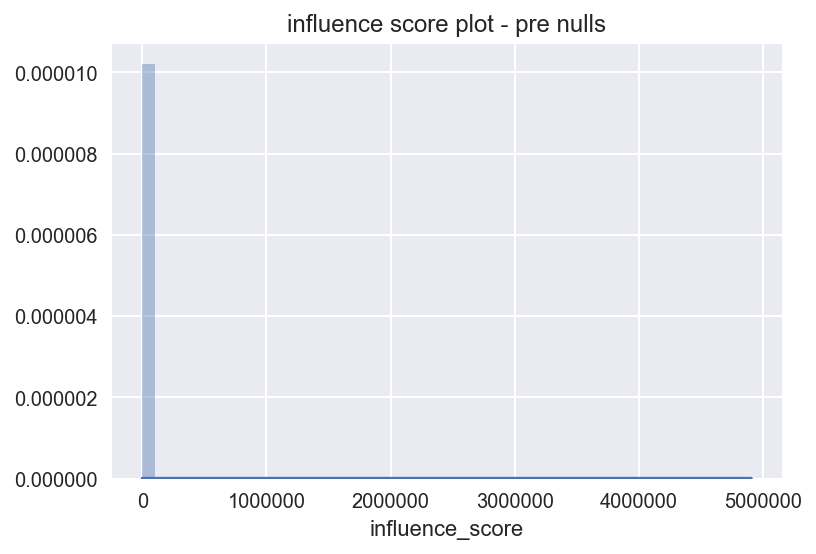

New row length: 189538
Max Influence Score: 14536.84


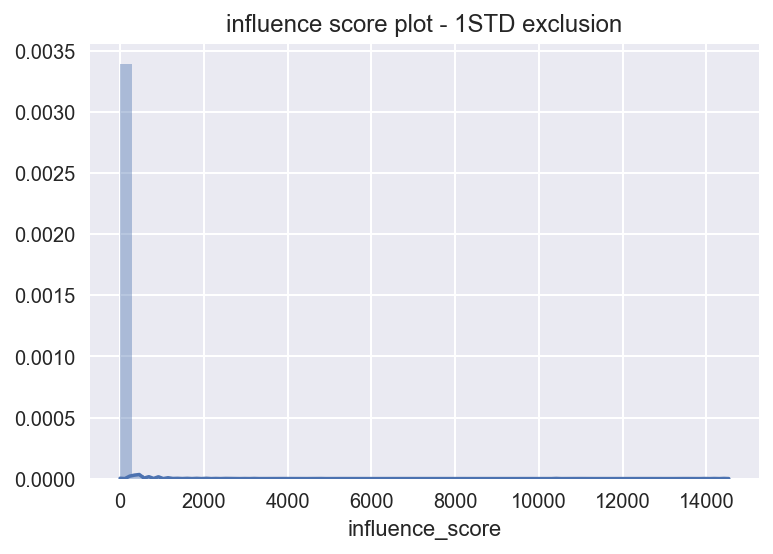

In [7]:
# Review of original influence score distribution
hd_influence = hail_data['influence_score'].dropna()

# Plot distribution pre-outlier exclusion
sns.distplot(hd_influence)
plt.title("influence score plot - pre nulls")
plt.show()

# Influence Score exclusion:

# Calculate mean and std
mean = np.mean(hail_data['influence_score'], axis=0)
sd = np.std(hail_data['influence_score'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in hail_data.influence_score if (x < mean + 1 * sd)]

# Filter hail data by friends counts to keep:
hail_data = hail_data.ix[(hail_data['influence_score'].isin(final_list))]

# Check length of new dataframe and new max friends count
print ("New row length:", len(hail_data))
print ("Max Influence Score:",hail_data['influence_score'].max())

# Plot distribution without outliers
sns.distplot(hail_data['influence_score'])
plt.title("influence score plot - 1STD exclusion")
plt.show()

# Replace influence score nulls with median
hail_data['influence_score'] = hail_data['influence_score'].fillna(hail_data['influence_score'].median())

**Comment:** After reducing the outlier exclusion to only 1 standard deviation, the distribution does not change significantly. The maximum value has reduced signfiicantly but the distribution is still very positively skewed.
Because of the very skewed data, replacing nulls with the median (instead of the mean) was deemed more appropriate.

As this data is only being used to refine the twitter data used for modelling (to increase confidence) I will not increase the penalty further as I will potentially lose useful tweets. This reasoning has been applied to the subsequent outlier exclusion for the remaining numeric user data.

#### _Favorites Count - Replacing nulls and removing outliers_

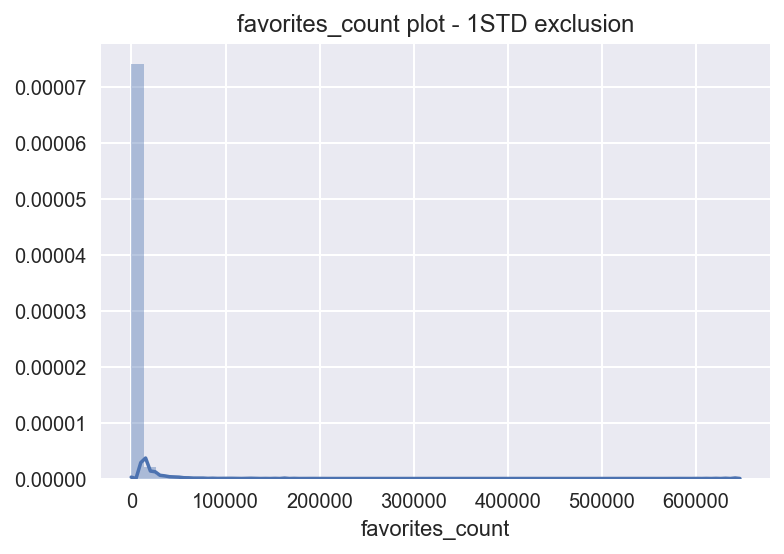

New row length: 183766
New Max Favourites Score: 16506


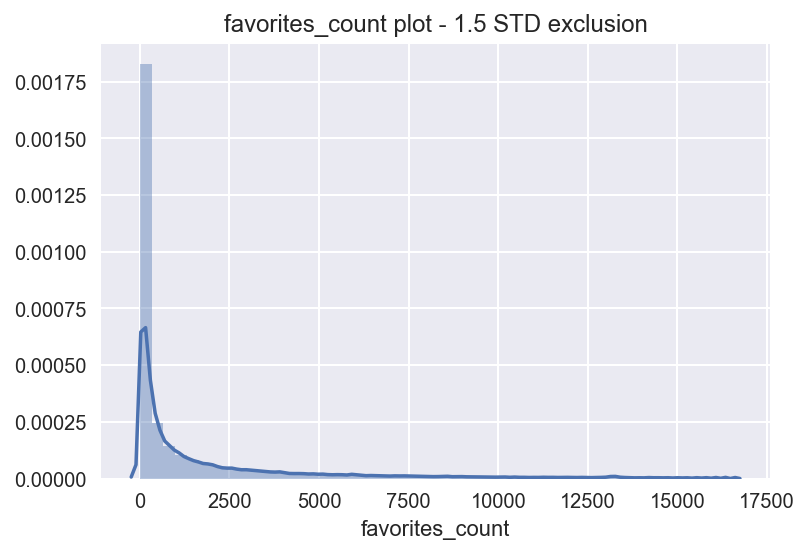

In [8]:
# Plot distribution pre-outlier exclusion
sns.distplot(hail_data['favorites_count'])
plt.title("favorites_count plot - 1STD exclusion")
plt.show()

# Calculate mean and std
mean = np.mean(hail_data['favorites_count'], axis=0)
sd = np.std(hail_data['favorites_count'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in hail_data.favorites_count if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
hail_data = hail_data.ix[(hail_data['favorites_count'].isin(final_list))]

# Check length of new dataframe and new max friends count
print ("New row length:",len(hail_data))
print ("New Max Favourites Score:",hail_data['favorites_count'].max())

# Plot distribution post-outlier exclusion
sns.distplot(hail_data['favorites_count'])
plt.title("favorites_count plot - 1.5 STD exclusion")
plt.show()

#### _Statuses count  - Replacing nulls and removing outliers_

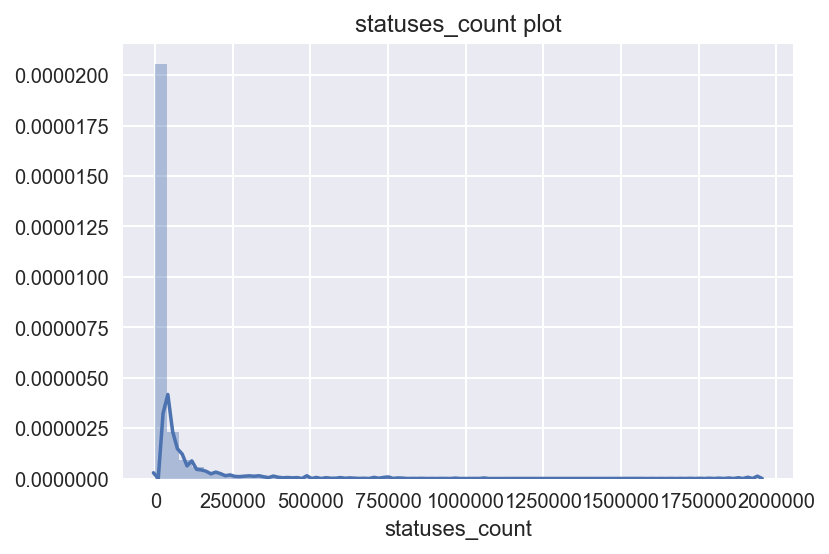

New row length: 175521
New Max Statuses Count: 176686


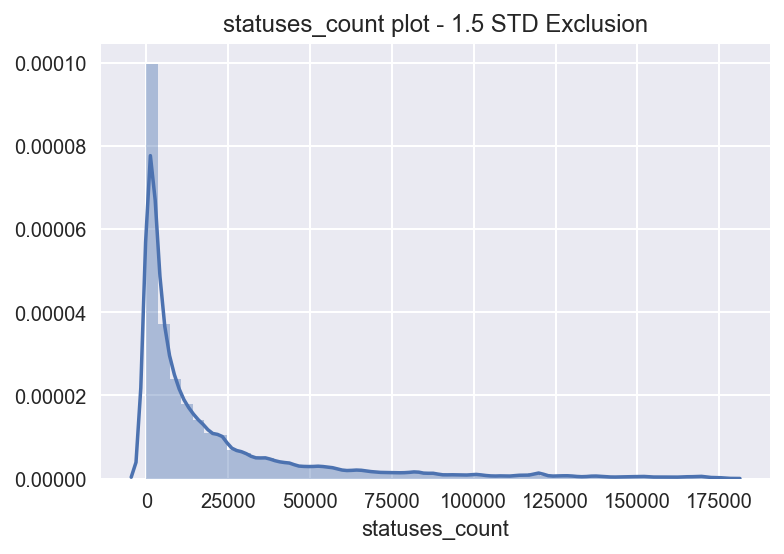

In [9]:
# Plot distribution pre-outlier exclusion
sns.distplot(hail_data['statuses_count'])
plt.title("statuses_count plot")
plt.show()

# Calculate mean and std
mean = np.mean(hail_data['statuses_count'], axis=0)
sd = np.std(hail_data['statuses_count'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in hail_data.statuses_count if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
hail_data = hail_data.ix[(hail_data['statuses_count'].isin(final_list))]

# Check length of new dataframe and new max friends count
print ("New row length:",len(hail_data))
print ("New Max Statuses Count:",hail_data['statuses_count'].max())

# Plot distribution post-outlier exclusion
sns.distplot(hail_data['statuses_count'])
plt.title("statuses_count plot - 1.5 STD Exclusion")
plt.show()

#### _Friends Count - Replacing nulls and removing outliers_

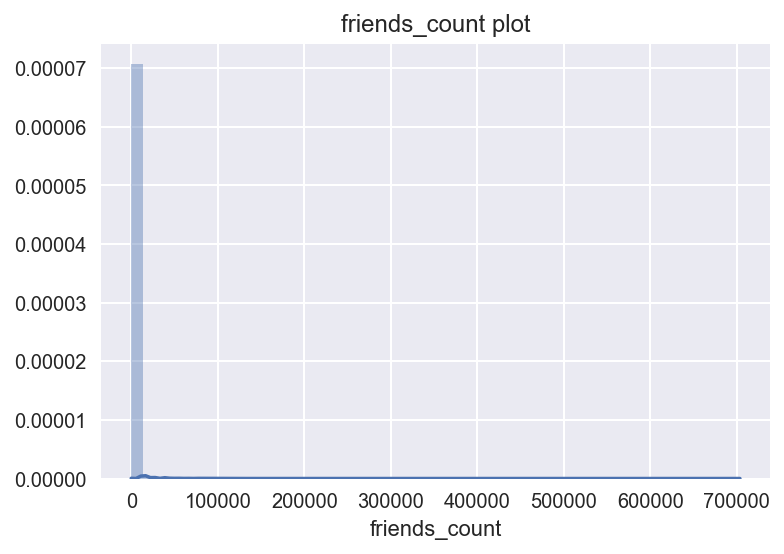

New row length: 173201
New Max Friends Count: 7830


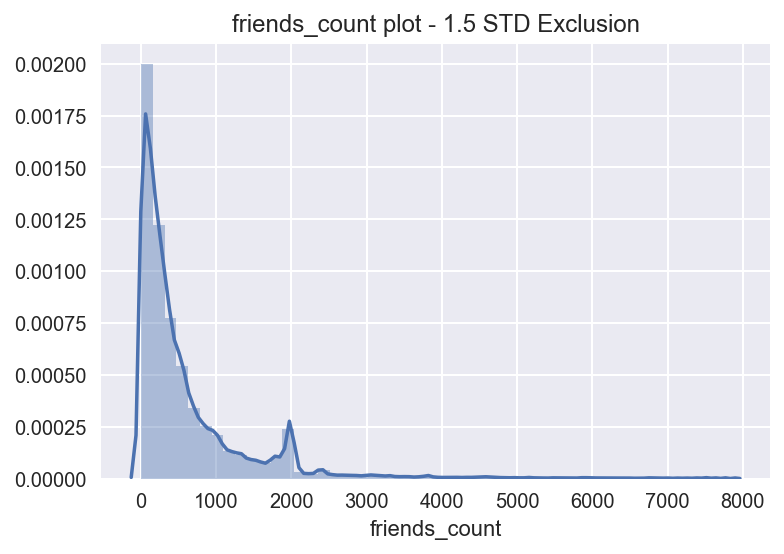

In [10]:
# Plot distribution pre-outlier exclusion
sns.distplot(hail_data['friends_count'])
plt.title("friends_count plot")
plt.show()

# Calculate mean and std
mean = np.mean(hail_data['friends_count'], axis=0)
sd = np.std(hail_data['friends_count'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in hail_data.friends_count if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
hail_data = hail_data.ix[(hail_data['friends_count'].isin(final_list))]

# Check length of new dataframe and new max friends count
print ("New row length:",len(hail_data))
print ("New Max Friends Count:",hail_data['friends_count'].max())

# Plot distribution post-outlier exclusion
sns.distplot(hail_data['friends_count'])
plt.title("friends_count plot - 1.5 STD Exclusion")
plt.show()

#### _Followers Count - Replacing nulls and removing outliers_

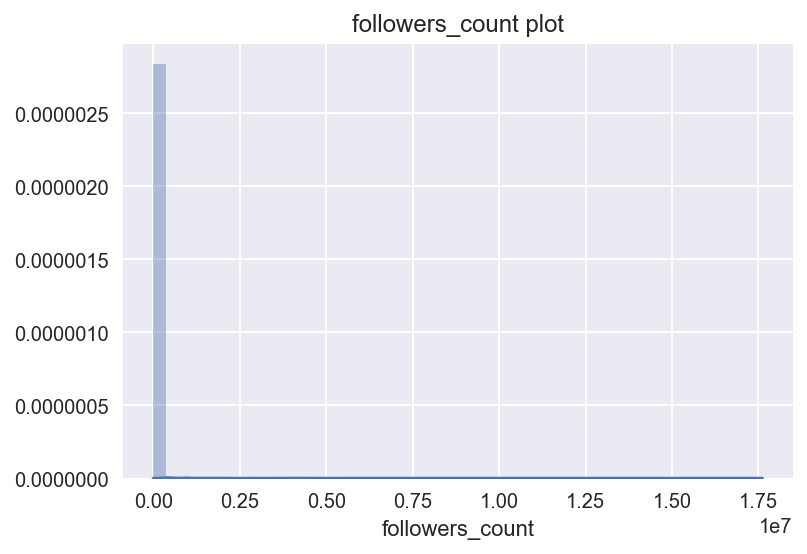

New row length: 172816
New Max Followers Count: 7830


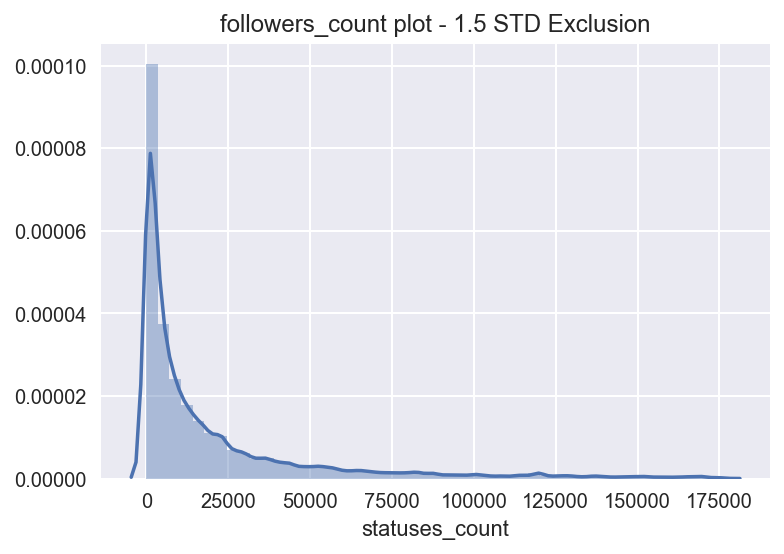

In [11]:
# Plot distribution pre-outlier exclusion
sns.distplot(hail_data['followers_count'])
plt.title("followers_count plot")
plt.show()

# Calculate mean and std
mean = np.mean(hail_data['followers_count'], axis=0)
sd = np.std(hail_data['followers_count'], axis=0)

# Create list of followers count values to keep:
followers_list = [x for x in hail_data.followers_count if (x < mean + 3 * sd)]

# Filter hail data by followers counts to keep:
hail_data = hail_data.ix[(hail_data['followers_count'].isin(followers_list))]

# Check length of new dataframe and new max followers count
print ("New row length:",len(hail_data))
print ("New Max Followers Count:", hail_data['friends_count'].max())

# Plot distribution post-outlier exclusion
sns.distplot(hail_data['statuses_count'])
plt.title("followers_count plot - 1.5 STD Exclusion")
plt.show()

**Discussion:** Overall the outlier exclusion definitely improves the distribution of most of the 5 user variables.

- Statuses and Friends counts improve outlier penalties of 1.5 standard deviations
- Followers improves with a penalty of 3 standard deviations
- Influence and favorites improve less with their standard deviation penalties.

As previously mentioned, we do not want to be more strict than this because we may begin to lose some of the confident tweets for our twitter modelling.

#### _Creating Time Variables_

In [12]:
# Convert original field to datetime format
hail_data['posted_time'] = pd.to_datetime(hail_data.posted_time,format='%H:%M:%S')

# Extract hour, minute and second. Time stamps are in GMT so we need to add 9 hours to covert to 
# local Aus Eastern Daylight time.
hail_data['posted_hour'] = (hail_data.posted_time.dt.hour)
hail_data['posted_min'] = hail_data.posted_time.dt.minute
hail_data['posted_sec'] = hail_data.posted_time.dt.second

# Convert values to numeric
hail_data[['posted_hour','posted_min','posted_sec']] = hail_data[['posted_hour','posted_min',
                                                                  'posted_sec']].apply(pd.to_numeric)

# Remove 'Twittascope' as it was dentified in part 2 of the capstone as an unreliable twitter source

hail_data_final = hail_data[hail_data['source'] != 'Twittascope']

### Twitter User Information Statistics - Plots and Correlation

In [13]:
# Create a dataframe of all numeric user variables:

user_variables = hail_data_final[['favorites_count', 'followers_count',\
          'friends_count', 'influence_score', 'statuses_count']]

# Standardise all user variables:

user_variables_ss = (user_variables - user_variables.mean()) / user_variables.std()

In [14]:
user_variables.describe()

,favorites_count,followers_count,friends_count,influence_score,statuses_count
count,145617.000000,145617.000000,145617.000000,145617.000000,145617.000000
mean,1370.516217,1860.580180,619.628622,15.501203,21750.395029
std,2748.492793,9410.879975,868.191700,177.053377,32459.664426
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,6.000000,106.000000,117.000000,0.530000,1849.000000
50%,148.000000,334.000000,312.000000,0.990000,8118.000000
75%,1259.000000,952.000000,742.000000,1.740000,25946.000000
max,16506.000000,228284.000000,7830.000000,13910.500000,176686.000000


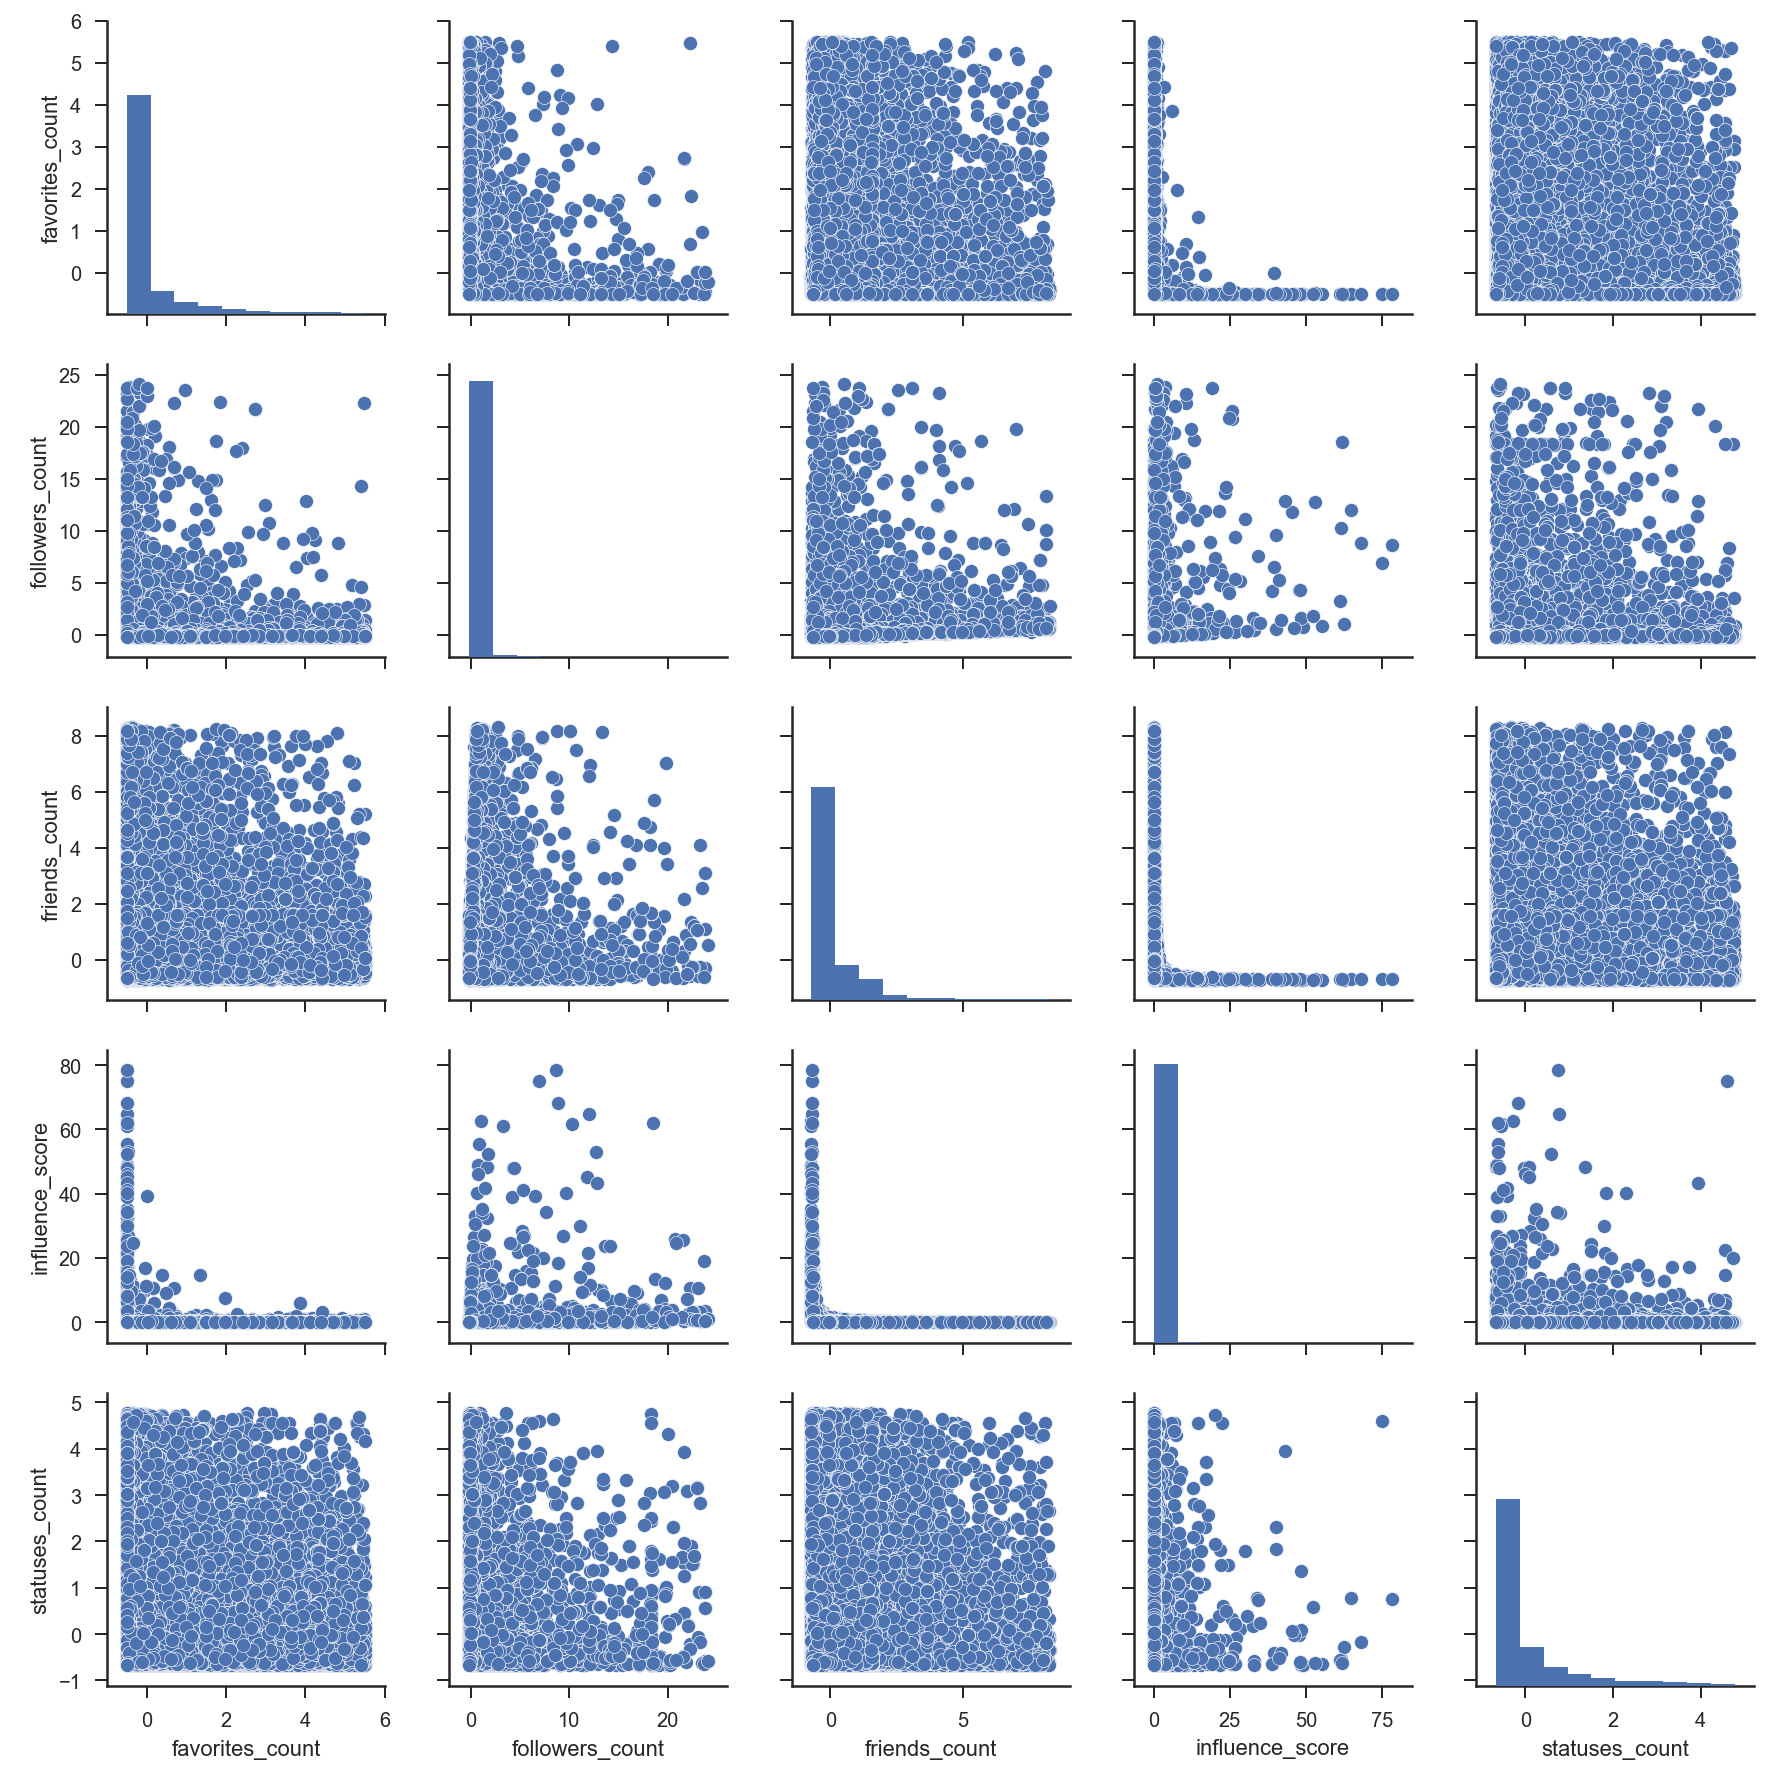

In [15]:
# Pairplot of all user variables

sns.set(style="ticks", color_codes=True)
sns.pairplot(user_variables_ss)

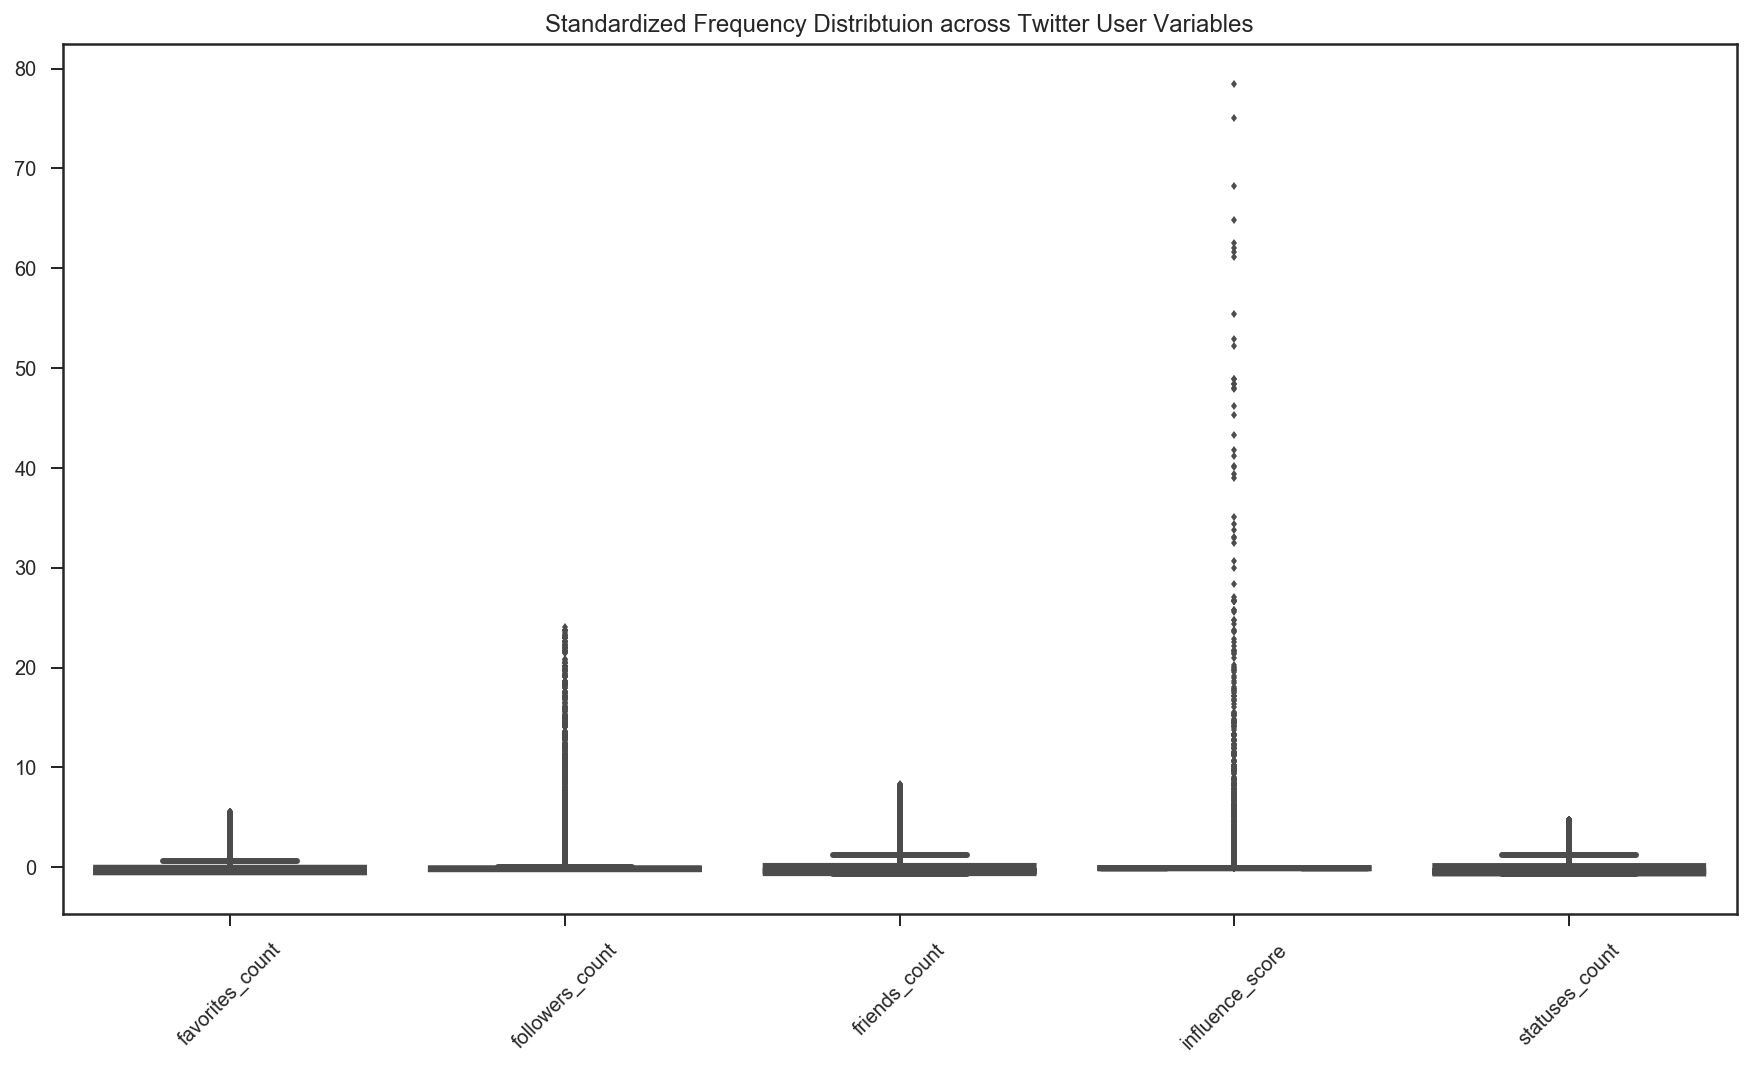

In [26]:
# Plot distribtions of the data

fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
ax = sns.boxplot(data=user_variables_ss, orient='v', fliersize=3,
                 linewidth=3, notch=True, saturation=0.5)
ax.set_title('Standardized Frequency Distribtuion across Twitter User Variables')
plt.xticks(rotation=45)
plt.show()

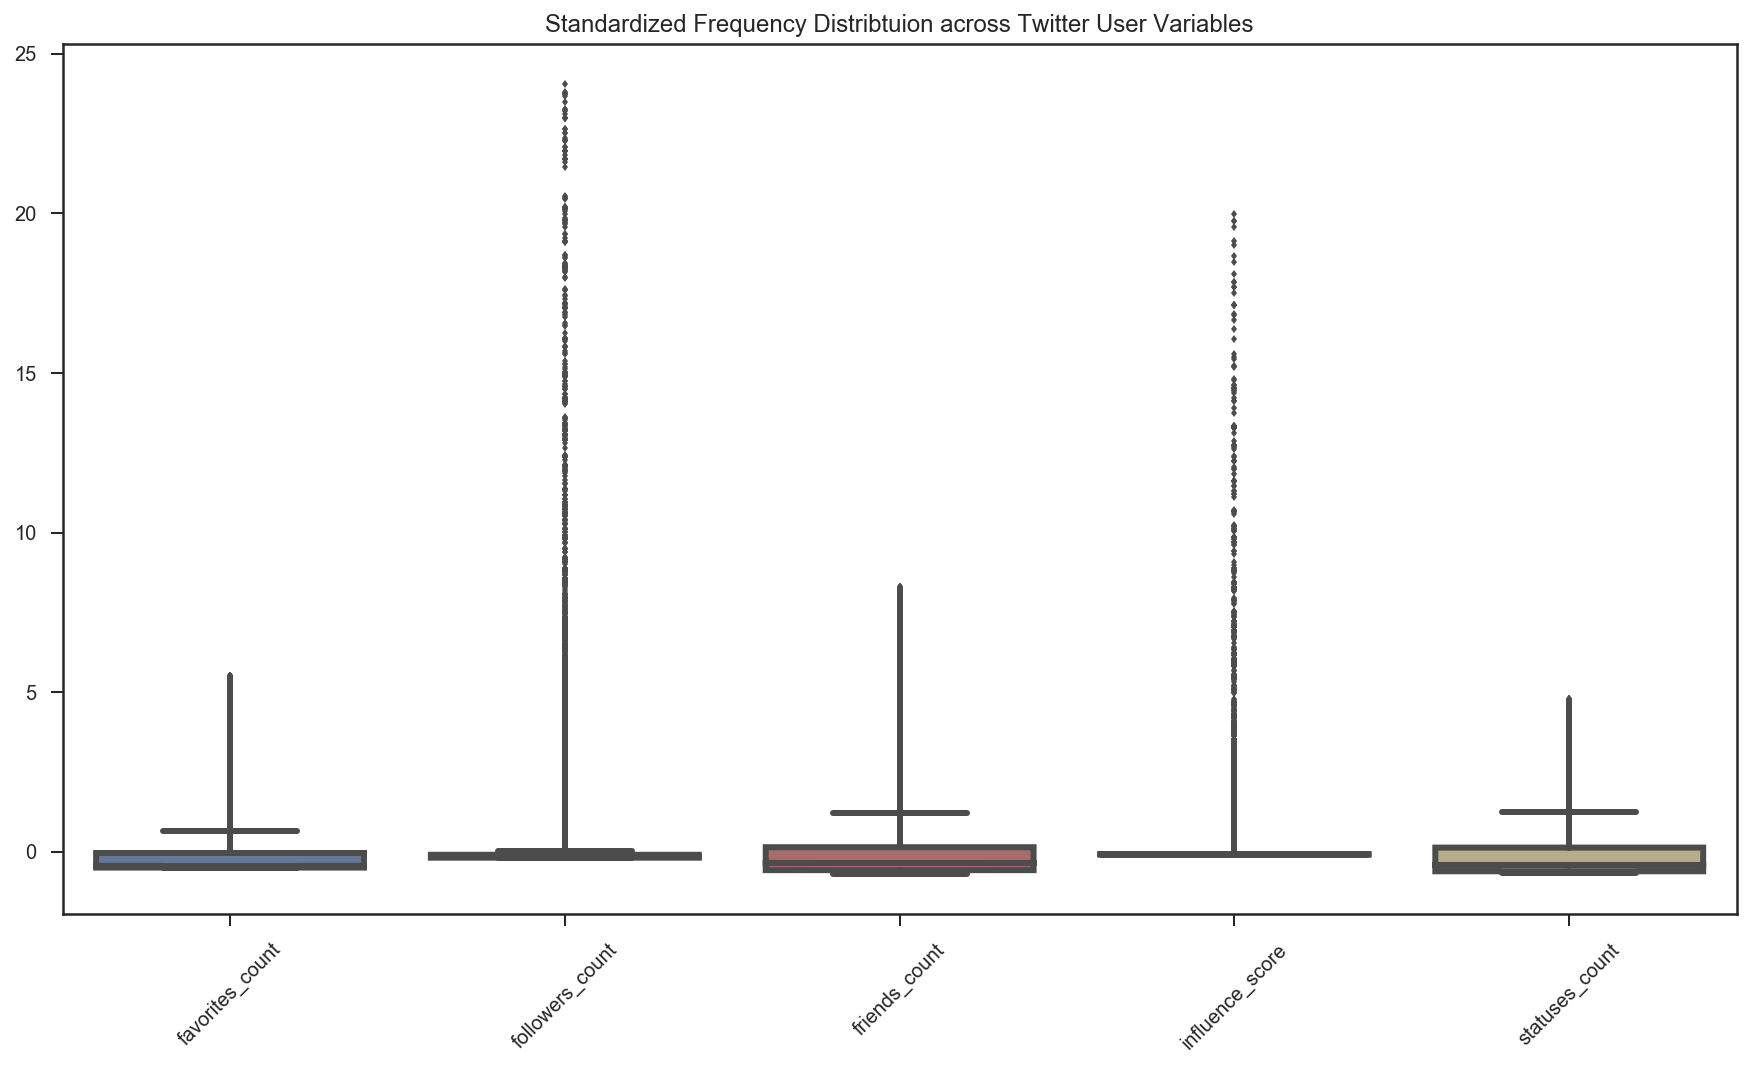

In [29]:
# Distribution Plot of data excluding influence scores >10

user_variables_ss_ = user_variables_ss[user_variables_ss['influence_score']<=20]

fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
ax = sns.boxplot(data=user_variables_ss_, orient='v', fliersize=3,
                 linewidth=3, notch=True, saturation=0.5)
ax.set_title('Standardized Frequency Distribtuion across Twitter User Variables')
plt.xticks(rotation=45)
plt.show()

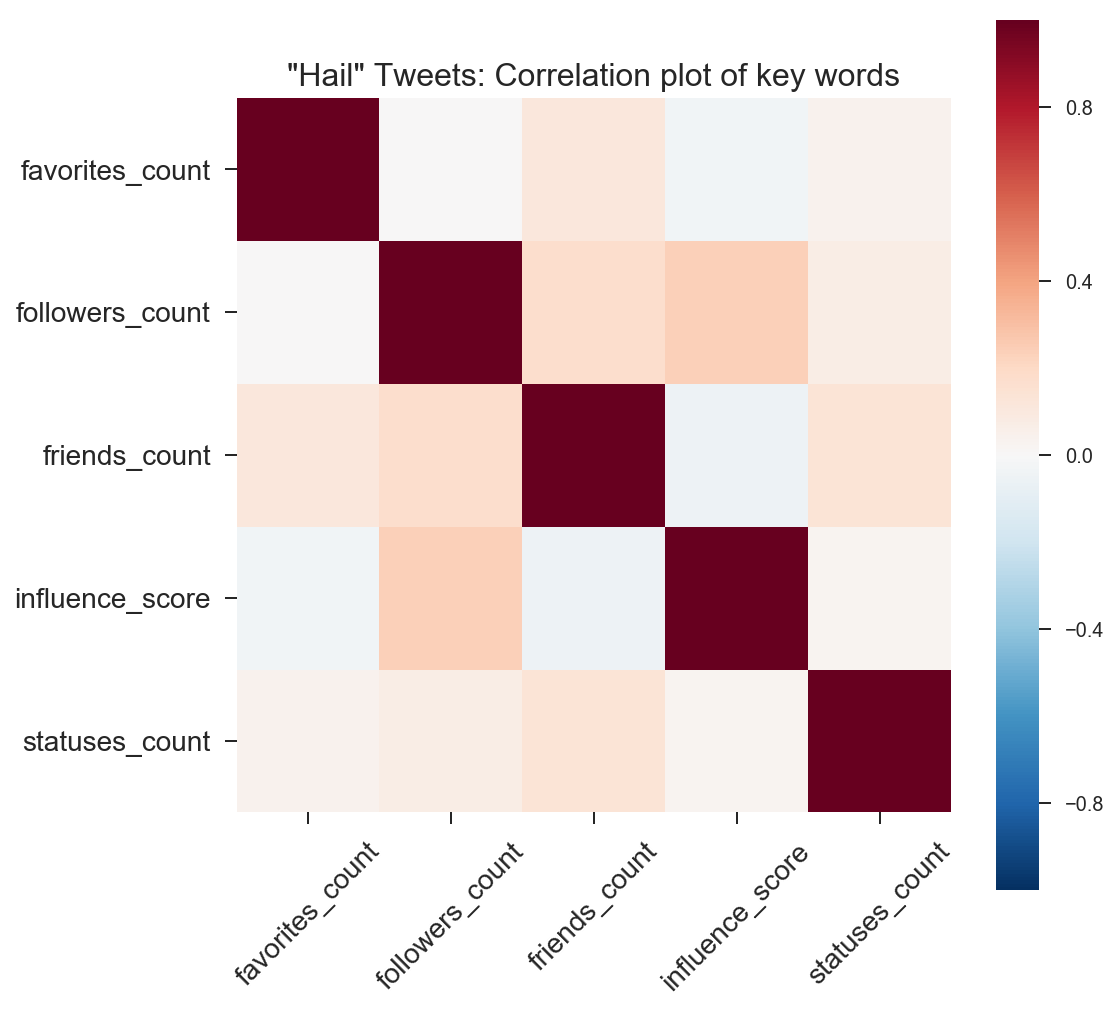

In [17]:
# Correlation plot of 5 numeric twitter user variables

corr = user_variables_ss.corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(data=corr, square=True, ax=ax)
plt.title('"Hail" Tweets: Correlation plot of key words',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### Twitter User Variables Discussion:

The primary purpose of the statistical analysis on the user variables is to reduce the dataset to increase the confidence of the users. This was done by removing nulls and outliers appropriate to the variables. Some key insights from the statistics and correlation plots include:
- Statuses, Followers and Friends count distribution are slightly less positively skewed with the oulier removal.
- Despite the low penalty (1 STD) for the influence score, some very high values are still recorded. Because of this, replace nulls with the median instead of the mean was deemed more appropriate. This distorts the box plot distribution graph of the variables.
- There is little correlation beween the 5 variables, the most being between the influence score and followers. Otherwise it is unclear how the influence score is determined.
- The mean statuses is very high! People obviously tweet a lot...

This exercise has been a useful extension of the preliminary EDA as it removes potential 'extreme' tweeters (or bots). I will now finalise the dataset that I will use in the main analysis; the tweet text data.

### _Finalise Dataset for 'Tweet' Analysis_

In [18]:
# Reset index and check columns

hail_data_final = hail_data_final.reset_index(drop=True)

hail_data_final.columns

Index(['Cat_ID', 'Text', 'Title', 'actor_languages', 'favorites_count',
       'followers_count', 'friends_count', 'geo_coordinates', 'geo_type',
       'hashtag', 'influence_score', 'inreplyto_link', 'language',
       'location_coords', 'location_displayname', 'location_geo_type',
       'location_name', 'location_type', 'object_country_code', 'posted_date',
       'posted_time', 'real_name', 'source', 'statuses_count',
       'user_bio_summary', 'user_id', 'user_is_verified', 'user_location',
       'user_mention', 'user_mention_username', 'username', 'verb',
       'posted_hour', 'posted_min', 'posted_sec'],
      dtype='object')

In [19]:
# Export final dataset to CSV (this will need to be executed as it is not provided in the repo):

hail_data_final[['Cat_ID', 'Text', 'Title', 'favorites_count',
       'followers_count', 'friends_count', 'statuses_count','geo_coordinates',
       'influence_score', 'language',
       'location_coords','location_name', 'posted_date',
       'posted_time', 'real_name', 'source', 
       'user_bio_summary', 'user_id', 'user_location',
       'user_mention', 'username', 'posted_hour', 'posted_min', 
       'posted_sec']].to_csv("./hail_data_final.csv")

The next stage of the project is to analyse the actual tweet text; the core data I wish to use in my analysis. In the next notebook I will perform an EDA on the text data using natural language processing (NLP).

---

### Link to [Notebook 2](capstone_technical_report_2_TweetTextNLP.ipynb)

----